In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter 
import sklearn

In C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\matplo

In [2]:
df  = pd.read_csv('spamm.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4040,spam,Please call our customer service representativ...,NaN,NaN,NaN
3445,ham,"Mon okie lor... Haha, best is cheap n gd food ...",NaN,NaN,NaN
3808,ham,At the funeral home with Audrey and dad,NaN,NaN,NaN
659,spam,88800 and 89034 are premium phone services cal...,NaN,NaN,NaN
3366,ham,Hey what are you doing. Y no reply pa..,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.data cleaning
# 2.EDA 
# 3.Text pre-processing
# 4.model building
# 5.evaluation
# 6.improvements 
# 7.website 
# 8.deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop un-necessary columns
df.drop(columns=['Unnamed: 2', "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.sample(5)

,v1,v2
2397,ham,Neshanth..tel me who r u?
4318,ham,Are you still playing with gautham?
3732,ham,Old Orchard near univ. How about you?
3743,ham,Nobody names their penis a girls name this sto...
4005,ham,IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...


In [9]:
# Renaming the columns 
df = df.rename(columns={'v1':'target', 'v2':'text'})
df.sample(5)

,target,text
2041,ham,ÌÏ dun wan to watch infernal affair?
2462,ham,"Rose needs water, season needs change, poet ne..."
1169,ham,Msgs r not time pass.They silently say that I ...
5177,ham,Very strange. and are watching the 2nd one n...
4728,ham,I've reached already.


In [10]:
df.columns

Index(['target', 'text'], dtype='object')

In [11]:
# changing labels from ham & spam to one hot encoded 0,1
encoder = LabelEncoder()

In [12]:
df.target = encoder.fit_transform(df.target)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#finding is there any null value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# finding duplicated values
df.duplicated().sum()

403

In [15]:
#droping duplicated values
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

# 2. EDA Exploratory Data Analysis

In [17]:
# Counting number of occurences of different class in target column
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

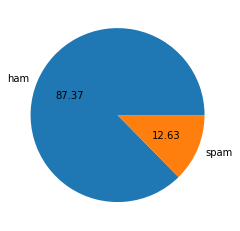

In [18]:
plt.pie(df.target.value_counts(),labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# counting number of characters in each sms

df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nasir
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# tokenizing (word-level)each word to get number of words in a sms

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# sentecne level tokenization to get number of sentences in each sentence 

df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
# basic description of all new added columns 

asd = df[['num_characters','num_words','num_sentence']]
asd.describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [27]:
# basic description of all new columns in HAM messages 

df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
# basic description of all new columns in SPAM messages 

ddf = df[df['target']==1][['num_characters','num_words','num_sentence']]

ddf.describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

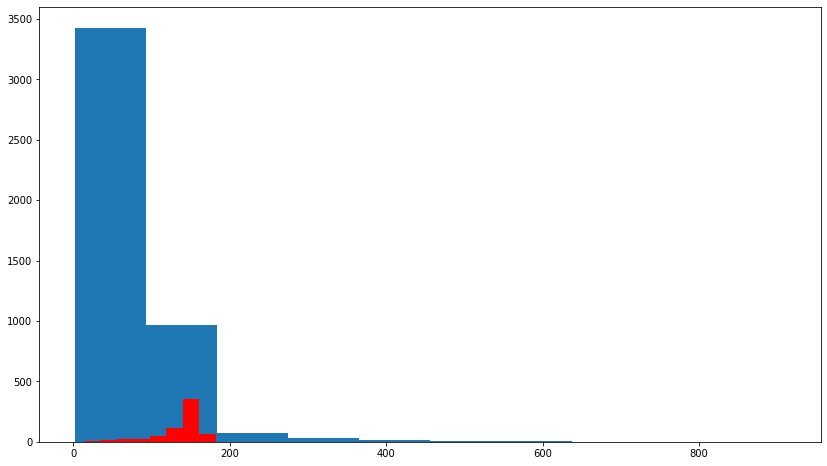

In [29]:
# ploting number of characters of both HAM and SPAM messages

plt.figure(figsize=(14,8))
plt.hist(df[df['target']==0]['num_characters'])
plt.hist(df[df['target']==1]['num_characters'],color='red')

(array([  5.,  20.,  16.,  34.,  42., 155., 191., 136.,  46.,   8.]),
 array([ 2. ,  6.2, 10.4, 14.6, 18.8, 23. , 27.2, 31.4, 35.6, 39.8, 44. ]),
 <BarContainer object of 10 artists>)

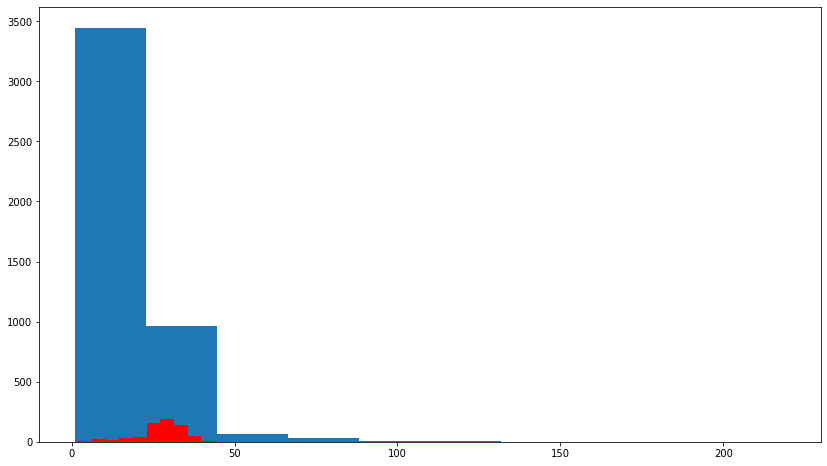

In [30]:
# ploting number of words of both ham and spam messages

plt.figure(figsize=(14,8))
plt.hist(df[df['target']==0]['num_words'])
plt.hist(df[df['target']==1]['num_words'],color='red')

(array([119., 145., 181., 107.,   0.,  65.,  21.,  13.,   1.,   1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

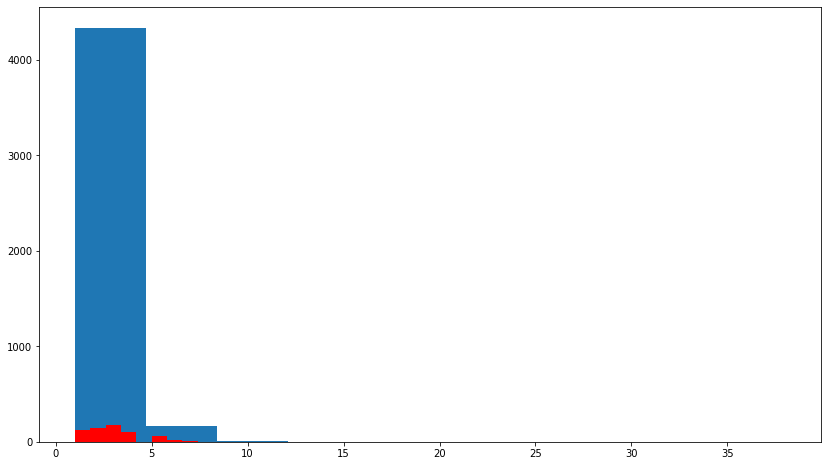

In [31]:
# ploting number of sentences of both ham and spam messages

plt.figure(figsize=(14,8))
plt.hist(df[df['target']==0]['num_sentence'])
plt.hist(df[df['target']==1]['num_sentence'],color='red')

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


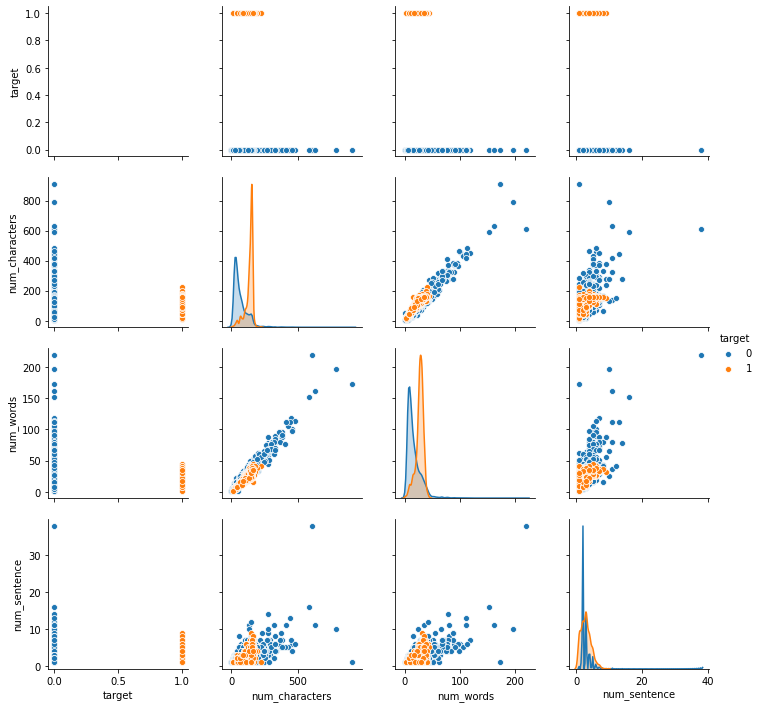

In [32]:
# ploting a piar plot to see relation ship of target with all new addes features 

sns.pairplot(df, hue='target')

In [33]:
# finding correlation among each features and target

df.corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.264160,0.267602
num_characters,0.384717,1.000000,0.965309,0.626118
num_words,0.264160,0.965309,1.000000,0.683584
num_sentence,0.267602,0.626118,0.683584,1.000000


<AxesSubplot:>

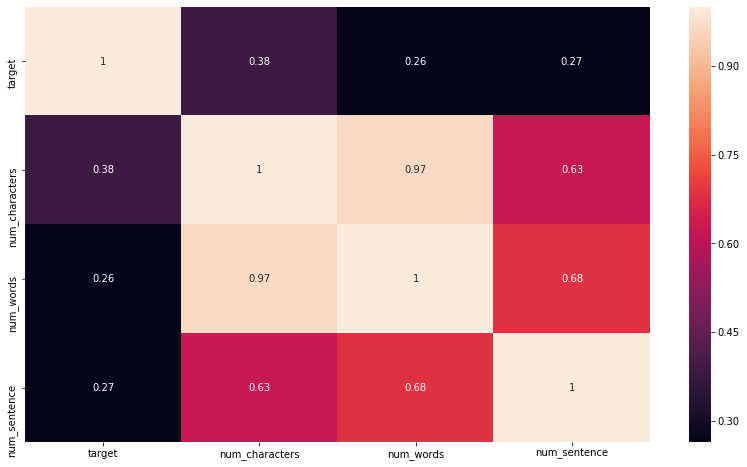

In [34]:
# ploting heatmap of correlation table with anotations

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
- Lower case
- Toeknization
- Removing special characters
- Removing stopwprds and punctuation
- Stemming


In [35]:
# need stop words to filter (drop) the sms 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Nasir
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
stop_words = stopwords.words('english')

In [37]:
# need puntuation to filter or drop from text 
punctuation = string.punctuation

In [38]:
# Apply stemming to get base words 
ps=PorterStemmer()

In [39]:
# taransformer fucntion

def transform_text(text):
    """ 
    transform text a function working as a tranformer for the text supplied to it
    it will return the text in string format with all these features:
    - text will be converted into lower case
    - text will be tokenize 
    - stop words will be removed from the text 
    - punctuations will be removed from the text 
    - stemmig will be applied to the text 
    - text will again be cnverted into string 
    """
    
    y=[]
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words and i not in punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [40]:
# examle test case 

transform_text("In the @? loving memory of my brother!")

'love memori brother'

In [41]:
df.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
# test run on a single sms from data 
transform_text(df.text[10])


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
# applied to all text in the data 

df['Transformed_text'] = df.text.apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
wc= WordCloud(width=800,height=400,min_font_size=10, background_color='white')

In [46]:
#creating wordcloud object for spam maessages 

spam_worldcloud = wc.generate(df[df['target']==1]['Transformed_text'].str.cat(sep=' '))

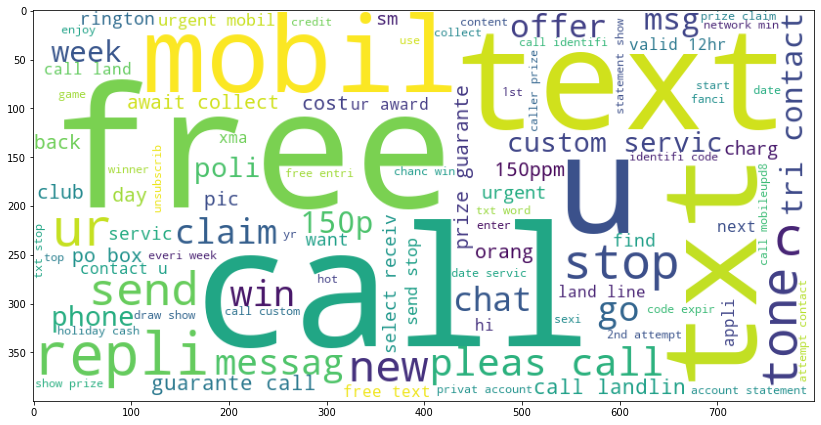

In [47]:
#ploting wordcloud of spam messages 

plt.figure(figsize=(14,10))
plt.imshow(spam_worldcloud)

In [48]:
#creating wordcloud object for spam maessages 

ham_worldcloud = wc.generate(df[df['target']==0]['Transformed_text'].str.cat(sep=' '))

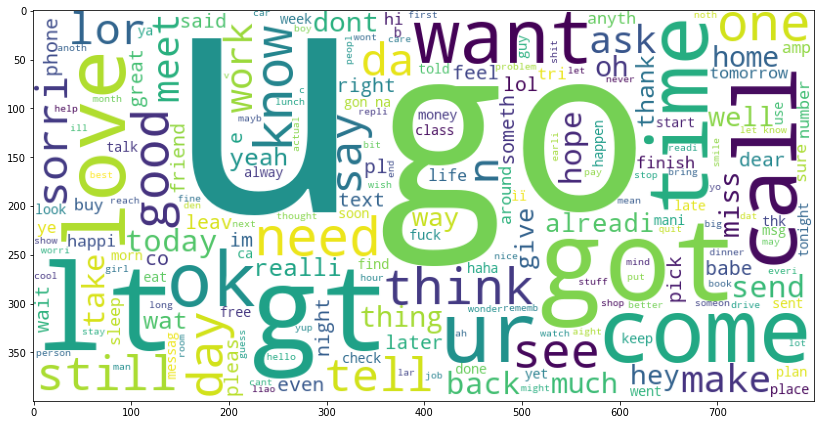

In [49]:
#ploting wordcloud of spam messages 

plt.figure(figsize=(14,10))
plt.imshow(ham_worldcloud)

In [50]:
# A corpus is a collection of authentic text or audio organized into datasets
# We are making corpus of spam messages to get frequesncy of each word in transformed text

spam_corpus=[]
for msg in df[df.target==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9883

In [52]:
# Counter object is used to make dictionary of word as a key and count as value

Counter(spam_corpus)

Counter({'free': 189,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [56]:
# Counter object is used to make dictionary of word as a key and count as value
# to get top 50 most occuring words 

Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('guarante', 42),
 ('messag', 40),
 ('per', 39),
 ('chat', 38),
 ('tri', 37),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('msg', 34),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [53]:
# Counter object is used to make dictionary of word as a key and count as value
# to get top 50 most occuring words
# converting dic into a dta frame 

pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [56]:
# Counter object is used to make dictionary of word as a key and count as value
# to get top 50 most occuring words
# converting dic into a dta frame
# slicing only the words from data frame

pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11      prize
12          4
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

<AxesSubplot:xlabel='0', ylabel='1'>

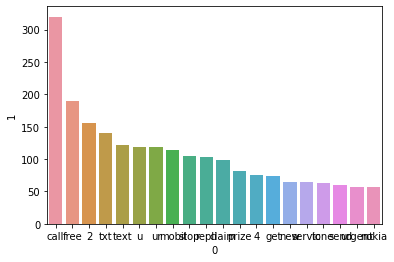

In [57]:
# Counter object is used to make dictionary of word as a key and count as value
# to get top 50 most occuring words
# converting dic into a dta frame
# slicing only the words from data frame
#ploting barplot of spam messages againt words and freq and giving x-axis as word and y-axis as freq  

sns.barplot((pd.DataFrame(Counter(spam_corpus).most_common(20)))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

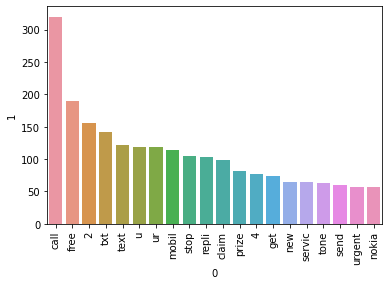

In [58]:
# Counter object is used to make dictionary of word as a key and count as value
# to get top 50 most occuring words
# converting dic into a dta frame
# slicing only the words from data frame
#ploting barplot of spam messages againt words and freq and giving x-axis as word and y-axis as freq  
#annotating ticks as vertical so that we can read word clearly

sns.barplot((pd.DataFrame(Counter(spam_corpus).most_common(20)))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
sns.barplot((pd.DataFrame(Counter(spam_corpus).most_common(20)))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
# A corpus is a collection of authentic text or audio organized into datasets
# We are making corpus of ham messages to get frequesncy of each word in transformed text 
ham_corpus=[]
for msg in df[df.target==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

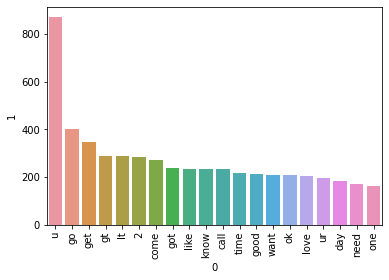

In [60]:
# Counter object is used to make dictionary of word as a key and count as value
# to get top 50 most occuring words
# converting dic into a dta frame
# slicing only the words from data frame
#ploting barplot of ham messages againt words and freq and giving x-axis as word and y-axis as freq 

sns.barplot((pd.DataFrame(Counter(ham_corpus).most_common(20)))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building 

- Naive Bayes Model (as it works best on textual data)
       -GaussianNB, 
       -MultinomialNB, 
       -BernoulliNB

#### We will convert text into words using any of these methods:
- <b>Bag of words</b> :A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things: A vocabulary of known words. A measure of the presence of known words.
- <b>Word to vectors</b> :Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.
- <b>n grams</b> :N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document. 
- <b>tfidf</b> :TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

# Bag of words 

In [62]:
# Vectorisation using Bag of words (CountVectorizer)

from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer()

# fit transform return a sparse array.
# we will convert it into a numpy array using toarray()

X = cv.fit_transform(df['Transformed_text']).toarray()
y = df['target'].values

# breaking data into train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=2)

# Using Naive bayes model versions

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Results 
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

# Cresting onject of all imported models 
gnb=GaussianNB()
print("GaussianNB")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

mnb = MultinomialNB()
print("MultinomialNB")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print("BernoulliNB")
bnb = BernoulliNB()

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

GaussianNB
0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229
MultinomialNB
0.965183752417795
[[872  24]
 [ 12 126]]
0.84
BernoulliNB
0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


# Tfidf
 - On all default hyperparameters

In [63]:
# Vectorisation using Bag of words (TFIDF Vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer()

X = tfidf.fit_transform(df['Transformed_text']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=2)

print("GaussianNB")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

print("MultinomialNB")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

print("BernoulliNB")
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

GaussianNB
0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009
MultinomialNB
0.9593810444874274
[[896   0]
 [ 42  96]]
1.0
BernoulliNB
0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


# Using different Machine Learning Models (Ensenble learning)
https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

Creating All ML models imported above

In [66]:
# 1. Support Vector Machine Classifier 
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

# 2.Naive Bayes Classifier
mnbc= MultinomialNB()

# 3. Decision Tree Classifier 
dtc = DecisionTreeClassifier(max_depth=5)

# 4. KNeighborsClassifier
knc = KNeighborsClassifier()

# 5. Logistic Regression Classifier
lrc = LogisticRegression(solver='liblinear',penalty='l1')

# 6. RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

# 7. AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,random_state=2)

# 8. BaggingClassifier
bc = BaggingClassifier(n_estimators=50,random_state=2)

# 9. ExtraTreesClassifier(RandomForest-more random than normal random forest)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

# 10. GradientBoostingClassifier
gbdtc  = GradientBoostingClassifier(n_estimators=50,random_state=2)

# 11.XGBoost Classifier
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [70]:
clfs={'SVC':svc ,'DT':dtc,'KN':knc ,'LR':lrc,'RF':rfc,'AdaBoost':abc,'BC':bc,'ETC':etc,'GBDT':gbdtc,'xgb':xgbc,'NB':mnbc }

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For: {name}")
    print(f'Accuracy: {current_accuracy}' )
    print(f'Precision: {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For: SVC
Accuracy: 0.9729206963249516
Precision: 0.9661016949152542
For: DT
Accuracy: 0.9352030947775629
Precision: 0.8380952380952381
For: KN
Accuracy: 0.9003868471953579
Precision: 1.0
For: LR
Accuracy: 0.9526112185686654
Precision: 0.9320388349514563
For: RF
Accuracy: 0.97678916827853
Precision: 0.9913793103448276
For: AdaBoost
Accuracy: 0.9613152804642167
Precision: 0.9298245614035088
For: BC
Accuracy: 0.9593810444874274
Precision: 0.8692307692307693
For: ETC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
For: GBDT
Accuracy: 0.9516441005802708
Precision: 0.8928571428571429


C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:08:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For: xgb
Accuracy: 0.9700193423597679
Precision: 0.928
For: NB
Accuracy: 0.9593810444874274
Precision: 1.0


In [71]:
performance_df = pd.DataFrame({'Algos':[key for key in clfs.keys()], 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algos,Accuracy,Precision
2,KN,0.900387,1.000000
10,NB,0.959381,1.000000
4,RF,0.976789,0.991379
7,ETC,0.975822,0.974790
0,SVC,0.972921,0.966102
3,LR,0.952611,0.932039
5,AdaBoost,0.961315,0.929825
9,xgb,0.970019,0.928000
8,GBDT,0.951644,0.892857
6,BC,0.959381,0.869231


# Improving Model
#### 1. Change the max features parameters of tfidf


In [72]:
# Vectorisation using term frequency-inverse document frequency (CountVectorizer)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features=3000)

# changed many times and result was good enuf on mx_features=3000
X = tfidf.fit_transform(df['Transformed_text']).toarray()

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.20,random_state=2)


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For: {name}")
    print(f'Accuracy: {current_accuracy}' )
    print(f'Precision: {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df_tfidf_max_features_3000 = pd.DataFrame({'Algos':[key for key in clfs.keys()], 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)
performance_df_tfidf_max_features_3000

For: SVC
Accuracy: 0.9748549323017408
Precision: 0.9666666666666667
For: DT
Accuracy: 0.9303675048355899
Precision: 0.84375
For: KN
Accuracy: 0.9052224371373307
Precision: 1.0
For: LR
Accuracy: 0.9574468085106383
Precision: 0.9519230769230769
For: RF
Accuracy: 0.971953578336557
Precision: 0.9739130434782609
For: AdaBoost
Accuracy: 0.9642166344294004
Precision: 0.9316239316239316
For: BC
Accuracy: 0.9545454545454546
Precision: 0.8582677165354331
For: ETC
Accuracy: 0.9777562862669246
Precision: 0.9831932773109243
For: GBDT
Accuracy: 0.9487427466150871
Precision: 0.9292929292929293


C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:19:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For: xgb
Accuracy: 0.9690522243713733
Precision: 0.9416666666666667
For: NB
Accuracy: 0.9729206963249516
Precision: 1.0


,Algos,Accuracy_max_ft_3000,Precision_max_ft_3000
2,KN,0.905222,1.000000
10,NB,0.972921,1.000000
7,ETC,0.977756,0.983193
4,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
3,LR,0.957447,0.951923
9,xgb,0.969052,0.941667
5,AdaBoost,0.964217,0.931624
8,GBDT,0.948743,0.929293
6,BC,0.954545,0.858268


In [ ]:
mnbc

In [73]:
merged1 = performance_df.merge(performance_df_tfidf_max_features_3000, on='Algos')
merged1

,Algos,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.972921,1.000000
2,RF,0.976789,0.991379,0.971954,0.973913
3,ETC,0.975822,0.974790,0.977756,0.983193
4,SVC,0.972921,0.966102,0.974855,0.966667
5,LR,0.952611,0.932039,0.957447,0.951923
6,AdaBoost,0.961315,0.929825,0.964217,0.931624
7,xgb,0.970019,0.928000,0.969052,0.941667
8,GBDT,0.951644,0.892857,0.948743,0.929293
9,BC,0.959381,0.869231,0.954545,0.858268


#### 2.Scaling the vector recevd from tfidf to improve algo performances

In [74]:
# Vectorisation using term frequency-inverse document frequency (CountVectorizer)


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features=3000)

# changed many times and result was good enuf on mx_features=3000

X = tfidf.fit_transform(df['Transformed_text']).toarray()

#Scaling the vector recevd from tfidf to improve algo performances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.20,random_state=2)

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For: {name}")
    print(f'Accuracy: {current_accuracy}' )
    print(f'Precision: {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df_tfidf_max_features_3000_minmaxScaler = pd.DataFrame({'Algos':[key for key in clfs.keys()], 'Accuracy_min_max':accuracy_scores, 'Precision_min_max':precision_scores}).sort_values('Precision_min_max', ascending=False)
performance_df_tfidf_max_features_3000_minmaxScaler

For: SVC
Accuracy: 0.9709864603481625
Precision: 0.9354838709677419
For: DT
Accuracy: 0.9313346228239845
Precision: 0.8316831683168316
For: KN
Accuracy: 0.9052224371373307
Precision: 1.0
For: LR
Accuracy: 0.9671179883945842
Precision: 0.9642857142857143
For: RF
Accuracy: 0.971953578336557
Precision: 0.9739130434782609
For: AdaBoost
Accuracy: 0.9642166344294004
Precision: 0.9316239316239316
For: BC
Accuracy: 0.9545454545454546
Precision: 0.8582677165354331
For: ETC
Accuracy: 0.9777562862669246
Precision: 0.9831932773109243
For: GBDT
Accuracy: 0.9487427466150871
Precision: 0.9292929292929293


C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:08:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For: xgb
Accuracy: 0.9690522243713733
Precision: 0.9416666666666667
For: NB
Accuracy: 0.9787234042553191
Precision: 0.9393939393939394


,Algos,Accuracy_min_max,Precision_min_max
2,KN,0.905222,1.000000
7,ETC,0.977756,0.983193
4,RF,0.971954,0.973913
3,LR,0.967118,0.964286
9,xgb,0.969052,0.941667
10,NB,0.978723,0.939394
0,SVC,0.970986,0.935484
5,AdaBoost,0.964217,0.931624
8,GBDT,0.948743,0.929293
6,BC,0.954545,0.858268


In [75]:
merged1.merge(merged2,on='Algos')

NameError: name 'merged2' is not defined

# What is the voting classifier?
A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. The aggregating criteria can be combined decision of voting for each estimator output.

https://towardsdatascience.com/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e

In [ ]:
from sklearn.ensemble import VotingClassifier
voting =VotingClassifier(estimators=[('svm',svc), ('nb',mnb),('et',etc)],voting='soft')

voting.fit_transform(X_train,y_train)

y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

# Stacking Classifier:
of estimators with a final classifier. Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

In [ ]:
estimators=[('svm',svc), ('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
#!pip install --upgrade scikit-learn

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))

# Pipe Line

-Step1: Text transformation

-Step2: Vectorization

-Step3: Apply Algo

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features=3000)

# changed many times and result was good enuf on mx_features=3000
X = tfidf.fit_transform(df['Transformed_text']).toarray()

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.20,random_state=2)


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For: {name}")
    print(f'Accuracy: {current_accuracy}' )
    print(f'Precision: {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
# performance_df_tfidf_max_features_3000 = pd.DataFrame({'Algos':[key for key in clfs.keys()], 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)
# performance_df_tfidf_max_features_3000

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnbc,open('model.pkl','wb'))

In [ ]:
mnb.score(X_train,y_train)